In [1]:
:bsymb

$\def\Inter{\bigcap\nolimits}\def\bfalse{\mathord\bot}\def\qdot{\mathord{\mkern1mu\cdot\mkern1mu}}\def\binter{\mathbin{\mkern1mu\cap\mkern1mu}}\def\dprod{\mathbin\otimes}\def\usucc{\mathop{\mathrm{succ}}\nolimits}\def\trel{\mathbin{<\mkern-6mu<\mkern-10mu-\mkern-10mu>}}\def\strel{\mathbin{<\mkern-6mu<\mkern-10mu-\mkern-10mu>\mkern-6mu>}}\def\Bool{\mathord{\mathrm{BOOL}}}\def\rel{\mathbin{<\mkern-10mu-\mkern-10mu>}}\def\pprod{\mathbin\mid}\def\id{\mathop{\mathrm{id}}\nolimits}\def\cprod{\mathbin\times}\def\ran{\mathop{\mathrm{ran}}\nolimits}\def\nat{\mathord{\mathbb N}}\def\pown{\mathop{\mathbb P_1}\nolimits}\def\finite{\mathop{\mathrm{finite}}\nolimits}\def\inter{\mathop{\mathrm{inter}}\nolimits}\def\prjone{\mathop{\mathrm{prj}_1}\nolimits}\def\defi{\mathrel{≙}}\def\ranres{\mathbin▷}\def\prjtwo{\mathop{\mathrm{prj}_2}\nolimits}\def\upred{\mathop{\mathrm{pred}}\nolimits}\def\fcomp{\mathbin;}\def\tbij{\mathbin⤖}\def\pfun{\mathbin↦}\def\tfun{\mathbin→}\def\card{\mathop{\mathrm{card}}\nolimits}\def\pinj{\mathbin⤔}\def\dom{\mathop{\mathrm{dom}}\nolimits}\def\bool{\mathop{\mathrm{bool}}\nolimits}\def\tinj{\mathbin↣}\def\domsub{\mathbin⩤}\def\Union{\bigcup\nolimits}\def\limp{\mathbin\Rightarrow}\def\ransub{\mathbin⩥}\def\psur{\mathbin⤅}\def\pow{\mathop{\mathbb P\hbox{}}\nolimits}\def\bcmsuch{\mathrel{:\mkern1mu\mid}}\def\natn{\mathord{\mathbb N_1}}\def\expn{\mathbin{\widehat{\mkern1em}}}\def\upto{\mathbin{.\mkern1mu.}}\def\bcomp{\circ}\def\bcmin{\mathrel{:\mkern1mu\in}}\def\ovl{\mathbin{<\mkern-11mu+}}\def\intg{\mathord{\mathbb Z}}\def\domres{\mathbin◁}\def\tsur{\mathbin↠}\def\btrue{\mathord\top}\def\union{\mathop{\mathrm{union}}\nolimits}\def\bcmeq{\mathrel{:\mkern1mu=}}\def\leqv{\mathbin\Leftrightarrow}\def\emptyset{\mathord\varnothing}\def\bunion{\mathbin{\mkern1mu\cup\mkern1mu}}\def\srel{\mathbin{<\mkern-10mu-\mkern-10mu>\mkern-6mu>}}\text{All bsymb.sty definitions have been loaded.}$

# Application: Course Notes for Theoretical Computer Science (NFA)



#### DEFINITION 2.9 (NFA)
A non-deterministic finite automaton
(NFA) is a  5-tuple $M = (\Sigma, Z, \delta , S, F)$, where

* $\Sigma$ is the alphabet,
* $Z$ is a finite set of states with $\Sigma \cap Z = \emptyset$,
* $\delta : Z \times \Sigma \rightarrow POW(Z)$ is the transition function
  ($\pow(Z)$ is the powerset of $Z$, the set of all subsets of $Z$),
* $S \subseteq Z$ is the set of initial states,
* $F \subseteq Z$ is the set of final (accepting) states.


#### DEFINITION 2.10 (Language of an NFA)

Die erweiterte Überführungsfunktion $\widehat{\delta} :
\pow(Z) \times \Sigma^* \rightarrow \pow(Z)$ von $M$ ist
induktiv definiert:
* $\widehat{\delta}(Z', \lambda) = Z'$
* $\widehat{\delta}(Z', ax) = \bigcup_{z \in Z'} \widehat{\delta}(\delta(z,a), x)$
für alle $Z' \subseteq Z$, $a \in \Sigma$ und $x \in \Sigma^*$.

Die vom NFA $M$ akzeptierte Sprache ist definiert durch
* L(M) = $\{w \in \Sigma^* \mid \widehat{\delta}(S,w) \cap F \neq \emptyset\}$



Wie laden nun ein B Modell welches diese Definitionen beinhaltet.
Wörter werden dabei in der B Sprache mit eckigen Klammern und Kommas geschrieben; aus 101 wird [1,0,1].
Gewisse griechische Zeichen sind in der B Sprache als Schlüsselwörter reserviert, zB $\lambda$.
Auch kann man leider kein $\hat{~}$ in Bezeichnern verwenden.
Deshalb wird aus
* $\Sigma^*$ wird ```seq(Σ)```
* $\widehat{\delta}$ wird ```δs```

In [2]:
::load
MACHINE NFA_nach_DFA
SETS
   Z = {z0,z1,z2,z3}
ABSTRACT_CONSTANTS δs, L
CONSTANTS Σ, S, F, δ
PROPERTIES
 S ⊆ Z ∧ F ⊆ Z ∧ δ ∈ (Z×Σ) → ℙ(Z) ∧

 /* Definition der erweiterten Übergangsfunktion */
 δs ∈ (ℙ(Z)×seq(Σ)) → ℙ(Z) ∧
 δs = λ(Z2,s).(Z2⊆Z ∧ s∈seq(Σ) | 
           IF s=[] THEN Z2
           ELSE         ⋃(z).(z∈Z2|δs(δ(z,first(s)),tail(s))) END)
 ∧
 /* die vom Automaten generierte Sprache */
 L = {ω|ω∈seq(Σ) ∧ δs(S,ω) ∩ F ≠ ∅}
 ∧
 /* Nun ein Beispiel-Automat von Folie 24 (Info 4) */
 Σ = {0,1} ∧
 S = {z0} ∧ F={z2} ∧
 δ = {     (z0,0)↦{z0}, (z0,1)↦{z0,z1},
           (z1,0)↦{z2}, (z1,1)↦{z2},
           (z2,0)↦{z3}, (z2,1)↦{z3},
           (z3,0)↦{z3}, (z3,1)↦{z3} }
END

Loaded machine: NFA_nach_DFA

In [3]:
:constants

Executed operation: SETUP_CONSTANTS()

In [4]:
:init

Executed operation: INITIALISATION()

Die Übergangsfunktion $\delta$ gibt us für einen Zustand und ein Symbol die möglichen nächsten Zustande an:

In [5]:
δ(z0,1)

$\{\mathit{z0},\mathit{z1}\}$

As you can see, the automaton is non-deterministic as there are two successors for the state ```z0``` and the input symbol ```1```.

We can examine the transition function of this automaton as a table:

In [6]:
:table δ

|prj11|prj12|prj2|
|---|---|---|
|z0|0|{z0}|
|z0|1|{z0,z1}|
|z1|0|{z2}|
|z1|1|{z2}|
|z2|0|{z3}|
|z2|1|{z3}|
|z3|0|{z3}|
|z3|1|{z3}|


Alternatively, we can view it as graph:

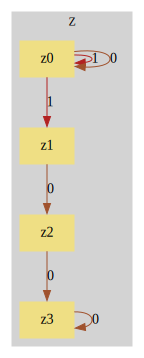

In [7]:
:dot expr_as_graph ("0",{x,y| x∈Z & y:δ(x,0)},
                    "1",{x,y| x∈S & y∈δ(x,1)})

Die Funktion $\widehat{\delta}$ berechnet die möglichen Zustände nach dem Abarbeiten eines Wortes. Zum Beispiel, kann sich der Automat nach dem Abarbeiten des Präfixes 111 in folgenden Zuständen befinden:

In [8]:
δs(S,[1,1,1])

$\{\mathit{z0},\mathit{z1},\mathit{z2},\mathit{z3}\}$

Der Automat akzeptiert zum Beispiel das Wort 111 und das Wort 101 nicht, da:

In [9]:
δs(S,[1,1,1]) ∩ F

$\{\mathit{z2}\}$

Folgende Wörter der Länge 3 werden vom Automaten akzeptiert:

In [10]:
:table {x,y,z| [x,y,z]∈L}

|x|y|z|
|---|---|---|
|0|1|0|
|0|1|1|
|1|1|0|
|1|1|1|


and the following words of length 3 are not accepted:

In [11]:
:table {x,y,z| {x,y,z} ⊆ Σ & ¬([x,y,z]∈L)}

|x|y|z|
|---|---|---|
|0|0|0|
|0|0|1|
|1|0|0|
|1|0|1|


Es stellt sich die Frage, ob NFAs mächtiger sind als DFAs. Die 
Antwort lautet: Nein.

## Theorem (Rabin und Scott)
Jede von einem NFA akzeptierte Sprache kann auch von einem DFA akzeptiert
werden.

### Beweis
Sei $M = (\Sigma, Z, \delta , S, E)$ ein NFA. 
Konstruiere einen zu
  $M$ äquivalenten DFA 
  $M' = (\Sigma, \pow(Z), \delta' ,z_0', F)$ wie folgt:
* Zustandsmenge von $M'$: die Potenzmenge $\pow(Z)$ von $Z$,
* $\delta'(Z' , a) = \widehat{\delta}(Z',a)$ für alle $Z' \subseteq Z$ und $a \in \Sigma$,
* $z_0'=S$,
* $F = \{ Z' \subseteq Z \mid Z' \cap E \neq \emptyset\}$.
Offenbar sind M' und M äquivalent, denn für alle ...



Für den oben geladen Automaten können wir diese Konstruktion illustrieren.
Die Potenzmenge der Zustände ist:

In [12]:
ℙ(Z)

$\def\emptyset{\mathord\varnothing}\{\emptyset,\{\mathit{z0}\},\{\mathit{z0},\mathit{z1}\},\{\mathit{z0},\mathit{z2}\},\{\mathit{z0},\mathit{z3}\},\{\mathit{z1}\},\{\mathit{z0},\mathit{z1},\mathit{z2}\},\{\mathit{z0},\mathit{z1},\mathit{z3}\},\{\mathit{z1},\mathit{z2}\},\{\mathit{z1},\mathit{z3}\},\{\mathit{z0},\mathit{z1},\mathit{z2},\mathit{z3}\},\{\mathit{z2}\},\{\mathit{z0},\mathit{z2},\mathit{z3}\},\{\mathit{z1},\mathit{z2},\mathit{z3}\},\{\mathit{z2},\mathit{z3}\},\{\mathit{z3}\}\}$

Tabellarisch können wir $\widehat{\delta}$ für $\pow(Z)$ wie folgt ausrechnen:

In [13]:
:table {x,a,y| a∈Σ & x∈ℙ(Z) & y=δs(x,[a])}

|x|a|y|
|---|---|---|
|∅|0|∅|
|∅|1|∅|
|{z0}|0|{z0}|
|{z0}|1|{z0,z1}|
|{z0,z1}|0|{z0,z2}|
|{z0,z1}|1|{z0,z1,z2}|
|{z0,z2}|0|{z0,z3}|
|{z0,z2}|1|{z0,z1,z3}|
|{z0,z3}|0|{z0,z3}|
|{z0,z3}|1|{z0,z1,z3}|
|{z1}|0|{z2}|
|{z1}|1|{z2}|
|{z0,z1,z2}|0|{z0,z2,z3}|
|{z0,z1,z2}|1|{z0,z1,z2,z3}|
|{z0,z1,z3}|0|{z0,z2,z3}|
|{z0,z1,z3}|1|{z0,z1,z2,z3}|
|{z1,z2}|0|{z2,z3}|
|{z1,z2}|1|{z2,z3}|
|{z1,z3}|0|{z2,z3}|
|{z1,z3}|1|{z2,z3}|
|{z0,z1,z2,z3}|0|{z0,z2,z3}|
|{z0,z1,z2,z3}|1|{z0,z1,z2,z3}|
|{z2}|0|{z3}|
|{z2}|1|{z3}|
|{z0,z2,z3}|0|{z0,z3}|
|{z0,z2,z3}|1|{z0,z1,z3}|
|{z1,z2,z3}|0|{z2,z3}|
|{z1,z2,z3}|1|{z2,z3}|
|{z2,z3}|0|{z3}|
|{z2,z3}|1|{z3}|
|{z3}|0|{z3}|
|{z3}|1|{z3}|


Graphisch lässt sich der Automat wie folgt darstellen; die Start und Endzustände sind noch nicht schön markiert.

In [14]:
:pref DOT_DECOMPOSE_NODES=FALSE

Preference changed: DOT_DECOMPOSE_NODES = FALSE


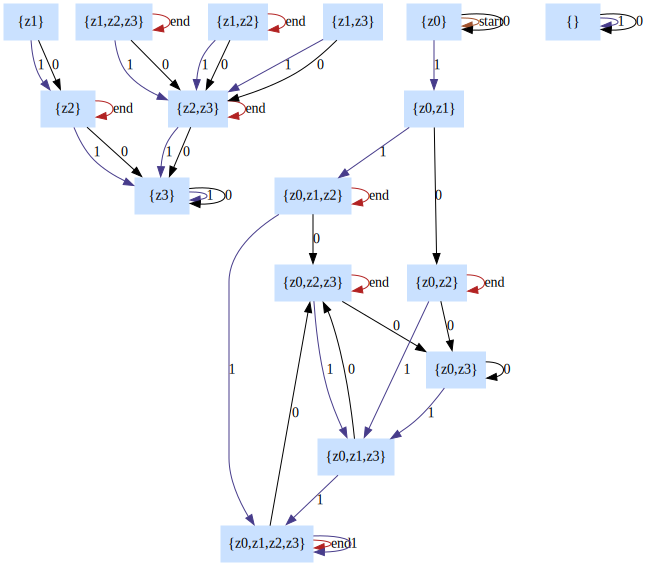

In [15]:
:dot expr_as_graph ("0",{x,y| x∈ℙ(Z) & δs(x,[0]) = y},
                    "1",{x,y| x∈ℙ(Z) & δs(x,[1]) = y},
                    "start", {x,y|x=y & x={z0}},
                    "end", {x,y|x=y & x∩F ≠ ∅})